## Open Exploratory Data Analysis challenge (Innomatics Research Labs)
### TASK:
* Perform an end to end EDA on the dataset linked above. 


### PUBG Data Description

#### Key Points:

* In a PUBG game, up to 100 players start in each match (matchId). 
* Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated.
* In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
* You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats.
* The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.


### Expected Outcome

* Detailed univariate and bivariate analysis with proper observations.
* Identify some research questions and perform hypothesis testing to test your hypothesis.


## Steps to be followed

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    


### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Step 2: Data Inspection

In [2]:
#load the dataset
Pubg=pd.read_csv(r'data.csv')
Pubg=Pubg.iloc[:,1:]

#First few records of the dataset
Pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [3]:
Pubg.shape # rows x columns

(1111742, 29)

In [4]:
# Finding the categorical variables
categorical =[var for var in Pubg.columns if Pubg[var].dtype == 'O']
print('There are {} categorical Features\n in Pubg Dataset'.format(len(categorical)))
print('The categorical Features are :\n\n', categorical)

There are 4 categorical Features
 in Pubg Dataset
The categorical Features are :

 ['Id', 'groupId', 'matchId', 'matchType']


In [5]:
#Finding Numerical Variables
Numerical = [var for var in Pubg.columns if Pubg[var].dtype != 'O']
print('There are {} categorical Features\n in Pubg Dataset'.format(len(Numerical)))
print('The categorical Features are :\n\n', Numerical)

There are 25 categorical Features
 in Pubg Dataset
The categorical Features are :

 ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


### Step 3: Data Cleaning

In [6]:
#ratio of null values
Pubg.isnull().sum()/Pubg.shape[0] *100

Id                 0.00000
groupId            0.00000
matchId            0.00000
assists            0.00000
boosts             0.00000
damageDealt        0.00000
DBNOs              0.00000
headshotKills      0.00000
heals              0.00000
killPlace          0.00000
killPoints         0.00000
kills              0.00000
killStreaks        0.00000
longestKill        0.00000
matchDuration      0.00000
matchType          0.00000
maxPlace           0.00000
numGroups          0.00000
rankPoints         0.00000
revives            0.00000
rideDistance       0.00000
roadKills          0.00000
swimDistance       0.00000
teamKills          0.00000
vehicleDestroys    0.00000
walkDistance       0.00000
weaponsAcquired    0.00000
winPoints          0.00000
winPlacePerc       0.00009
dtype: float64

* ### No Missing values present in the dataset

### Step 4: Exploratory Data Analysis

In [7]:
Pubg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [8]:
## Univariate analysis
Pubg.weaponsAcquired.value_counts()

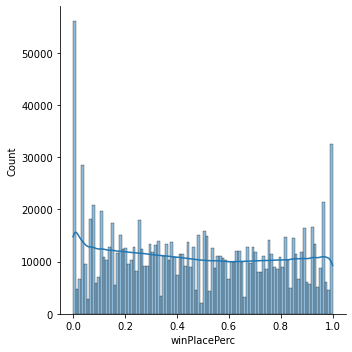

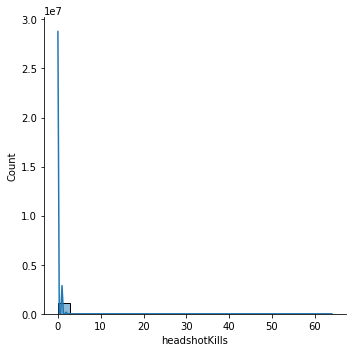

In [21]:
sns.displot(Pubg.winPlacePerc, kde = True)
sns.displot(Pubg.headshotKills, kde = True)

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('heals',data=Pubg,palette='ocean')

### Analysing By MatchId and Groupid

In [9]:
#DETAILS OF PLAYERS OF PARTICULAR MACTH ID & GROUP ID
subset = Pubg[Pubg['matchId']=='b65de9055327e0']
sub_grp = subset[subset['groupId']=='521836de101ee8']

print('matchId =\'b65de9055327e0\' and groupId =\'521836de101ee8\'')
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('numGroups:',subset['numGroups'].unique())
print('Maximum')
print('maxPlace:',subset['maxPlace'].unique())
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())

matchId ='b65de9055327e0' and groupId ='521836de101ee8'
players: 30
groups: 21
numGroups: [30]
Maximum
maxPlace: [30]
max-group players: 2
max-group winPlacePerc: [0.5862]


### Bivariate Analysis of two Numerical Variables (Numerical-Numerical)
* Scatter Plot

<AxesSubplot:xlabel='kills', ylabel='winPlacePerc'>

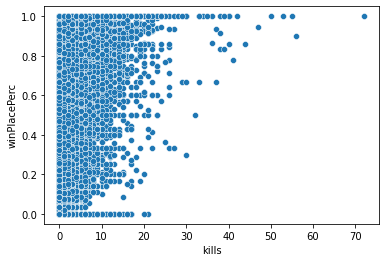

In [18]:
sns.scatterplot(data=Pubg, x="kills", y="winPlacePerc")
#70 Kills have highest winplace percentage

<AxesSubplot:xlabel='killPoints', ylabel='winPoints'>

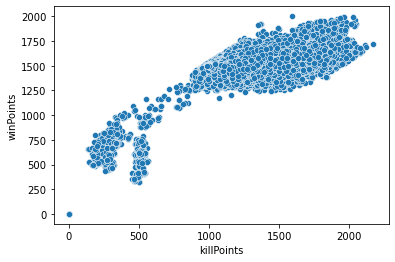

In [22]:
sns.scatterplot(data=Pubg, x="killPoints", y="winPoints")

<AxesSubplot:xlabel='walkDistance', ylabel='winPlacePerc'>

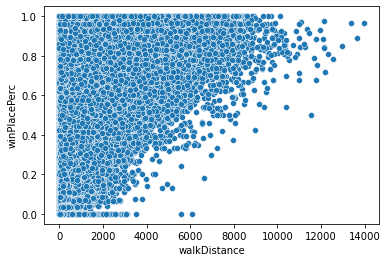

In [24]:
sns.scatterplot(data=Pubg, x="walkDistance", y="winPlacePerc")
#If walk distance is less then the winning percentage is less and vice versa

* Linear correlation between killPoints and winPoints

In [19]:
Pubg.groupby(['matchType'])['winPlacePerc'].count() # groupy match type

matchType
crashfpp              1581
crashtpp                86
duo                  78039
duo-fpp             249927
flarefpp               180
flaretpp               633
normal-duo              48
normal-duo-fpp        1400
normal-solo             75
normal-solo-fpp        465
normal-squad           135
normal-squad-fpp      4286
solo                 45679
solo-fpp            133853
squad               156573
squad-fpp           438781
Name: winPlacePerc, dtype: int64

### Different Match Types
* Solo(Single Player mode)- solo,solo-fpp,normal-solo,normal-solo-fpp
* Duo(Two Player mode)    - duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
* Squad(Four Player mode) - squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp

<AxesSubplot:>

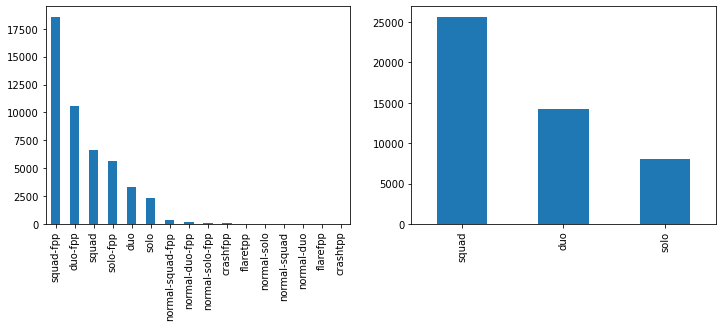

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#first subplot

Pubg.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

#second subplot

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
Pubg['matchType'] = Pubg['matchType'].apply(mapper)
Pubg.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

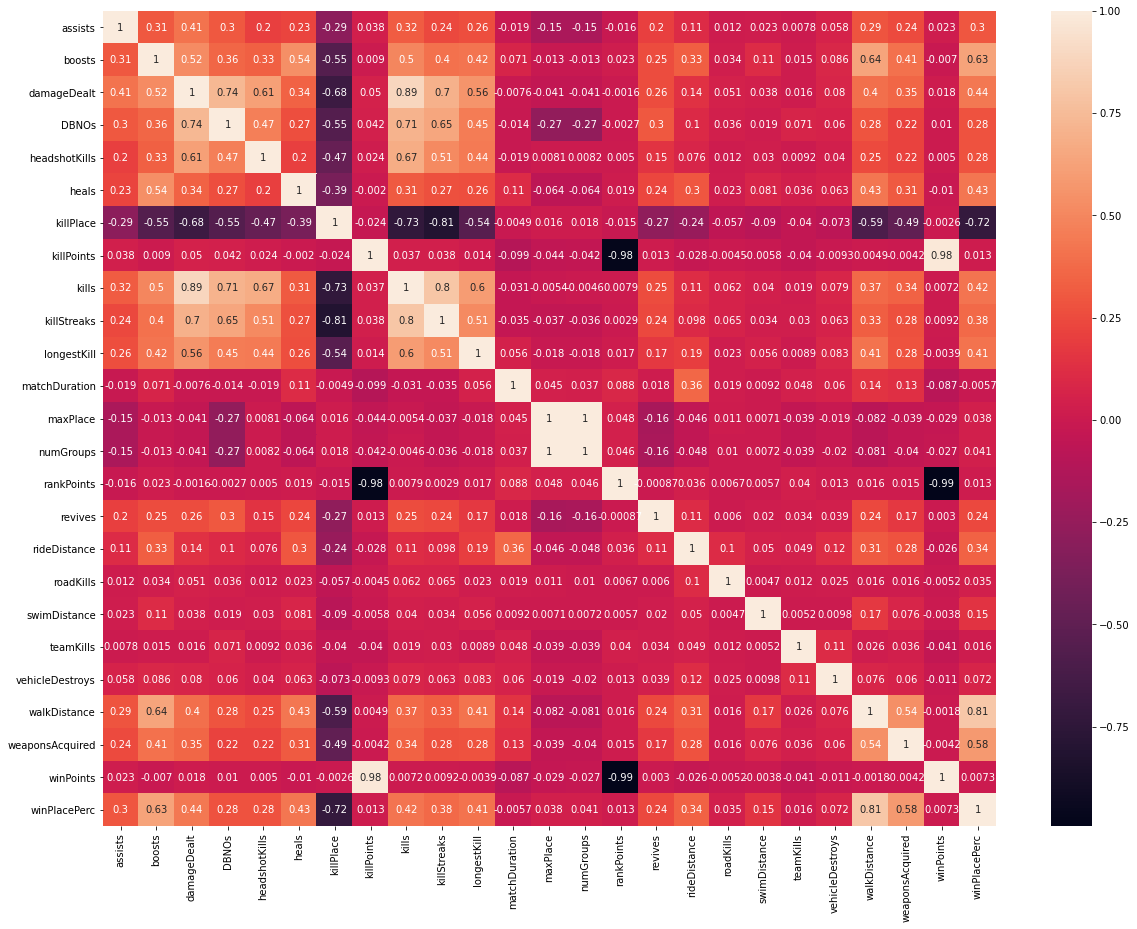

In [27]:
# plotting the heatmap(To identify outliers and relation between features)
f,ax = plt.subplots(figsize=(20, 15))

# setting the parameter values
annot = True
sns.heatmap(Pubg.corr(),annot=True)
plt.show()

* winpoint vs kill points having highest correlation 0.98
* If walk distance is high then winplace percentage is high
* Features with high positive correlation results linear upward trend between the features
* Features with Negative correlation results the trend in downwards trend between the features


### Maximum Kills

In [25]:
print("The maximum kills ever recorded is {} ,On an average a person kills {:.4f} players.".format(Pubg['kills'].max(), Pubg['kills'].mean()))

The maximum kills ever recorded is 72 ,On an average a person kills 0.9255 players.


### If walk distance is high then winplace percentage is high 

In [ ]:
print("{} players ({:.2f}%) walked none".format(len(Pubg[Pubg['walkDistance'] == 0]), 100*len(Pubg[Pubg['walkDistance']==0])/len(Pubg)))

* 2.24% of players, Either they die before even taking a step or they have just joined the game but are away from keyboard.